<a href="https://colab.research.google.com/github/RamcharanChandragiri/MACHINE-LEARNING/blob/main/ML_Lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUBTASK-01**

L2 Regularization -Ridge: Implementing Ridge Regression using libraries and
comparing results with standard Linear Regression.

Kaggle Dataset Link: https://www.kaggle.com/competitions/house-prices-advanced-
regression-techniques?

Tasks:
1. Load train.csv and select numeric features
2. Handle missing values and apply feature scaling.
3. Train LinearRegression() and Ridge() models.
4. Evaluate both using:
MSE, RMSE, R² score
5. Compare coefficients of both models and conclude Ridge effect.


In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
# Load dataset
data = pd.read_csv("train.csv")   # change path if needed

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Define target and features
y = numeric_data["SalePrice"]
X = numeric_data.drop("SalePrice", axis=1)
X = X.fillna(X.median())


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lr = lin_reg.predict(X_test_scaled)
ridge = Ridge(alpha=10)   # you can tune alpha
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)


In [8]:
def evaluate_model(name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}")
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)
    print("-------------------------")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)


Linear Regression
MSE: 1360121073.217982
RMSE: 36879.819321927025
R2 Score: 0.8226775450640491
-------------------------
Ridge Regression
MSE: 1359692101.2704306
RMSE: 36874.00305459702
R2 Score: 0.822733471231459
-------------------------


In [9]:
coef_comparison = pd.DataFrame({
    "Feature": X.columns,
    "Linear Coef": lin_reg.coef_,
    "Ridge Coef": ridge.coef_
})

print(coef_comparison.head())

# Check magnitude difference
print("\nAverage Absolute Coefficient:")
print("Linear:", np.mean(np.abs(lin_reg.coef_)))
print("Ridge:", np.mean(np.abs(ridge.coef_)))


       Feature   Linear Coef    Ridge Coef
0           Id   -946.987268   -946.097963
1   MSSubClass  -8588.504132  -8354.377503
2  LotFrontage  -2945.854496  -2826.881402
3      LotArea   4869.193287   4806.212803
4  OverallQual  24510.306339  24134.108984

Average Absolute Coefficient:
Linear: 4173.835956382745
Ridge: 4108.7940905468695


**SUBTASK-02**

L2 Regularization -Ridge: Implementing Ridge Regression using libraries and
comparing results with standard Linear Regression.

Kaggle Dataset Link: https://www.kaggle.com/datasets/mirichoi0218/insurance?

Tasks:
1. Load dataset and encode categorical columns (sex, smoker, region).
2. Use features: age, bmi, children, smoker
Target: charges
3. Train Linear Regression and Ridge Regression.
4. Try Ridge with different alpha values:
α = 0.1, 1, 10, 100
5. Compare model performance and identify best alpha.


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("insurance.csv")
df.head()
X = df[['age', 'bmi', 'children', 'smoker']]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['smoker']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)


In [ ]:
lin_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {lr_rmse:.2f}")
print(f"Linear Regression R²: {lr_r2:.4f}")

Linear Regression RMSE: 5829.38
Linear Regression R²: 0.7811


In [ ]:
alphas = [0.1, 1, 10, 100]
results = []

for alpha in alphas:
    ridge = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', Ridge(alpha=alpha))
    ])

    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append((alpha, rmse, r2))


In [ ]:
results_df = pd.DataFrame(
    results, columns=['Alpha', 'RMSE', 'R2']
)

results_df


,Alpha,RMSE,R2
0,0.1,3.398516e+07,0.781092
1,1.0,3.401931e+07,0.780872
2,10.0,3.458701e+07,0.777216
3,100.0,4.876589e+07,0.685885


In [ ]:
best_alpha = results_df.loc[results_df['RMSE'].idxmin()]
best_alpha


,0
Alpha,1.000000e-01
RMSE,3.398516e+07
R2,7.810922e-01


**SUBTASK-03**

L2 Regularization -Ridge: Implementing Ridge Regression using libraries and
comparing results with standard Linear Regression.

Kaggle Dataset Link: https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset?

Tasks:
1. Load dataset and select:
Features: TV, Radio, Newspaper
Target: Sales
2. Split dataset into train/test (80/20).
3. Train Linear Regression and Ridge Regression.
4. Compare using:
MAE, MSE, R² score
5. Plot Actual vs Predicted for both models and compare results.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
df = pd.read_csv("Advertising Budget and Sales.csv")
df.head()
X = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
y = df['Sales ($)']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"MAE: {lr_mae:.3f}")
print(f"MSE: {lr_mse:.3f}")
print(f"R² : {lr_r2:.4f}")


Linear Regression:
MAE: 1.461
MSE: 3.174
R² : 0.8994


In [ ]:
ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0))
])

ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression:")
print(f"MAE: {ridge_mae:.3f}")
print(f"MSE: {ridge_mse:.3f}")
print(f"R² : {ridge_r2:.4f}")



Ridge Regression:
MAE: 1.464
MSE: 3.194
R² : 0.8988


               Model       MAE       MSE        R2
0  Linear Regression  1.460757  3.174097  0.899438
1   Ridge Regression  1.464301  3.194156  0.898803


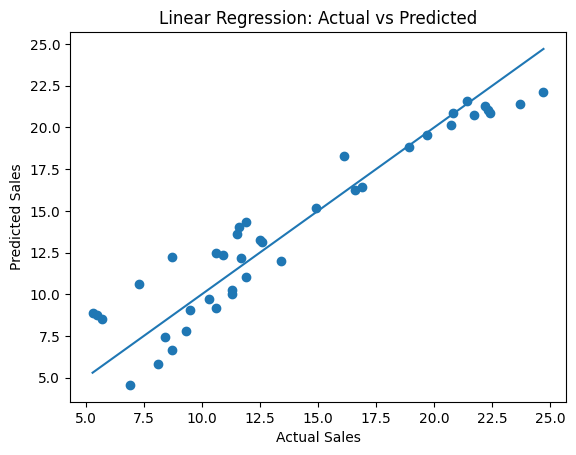

In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression'],
    'MAE': [lr_mae, ridge_mae],
    'MSE': [lr_mse, ridge_mse],
    'R2': [lr_r2, ridge_r2]
})

print(results)

plt.figure()
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


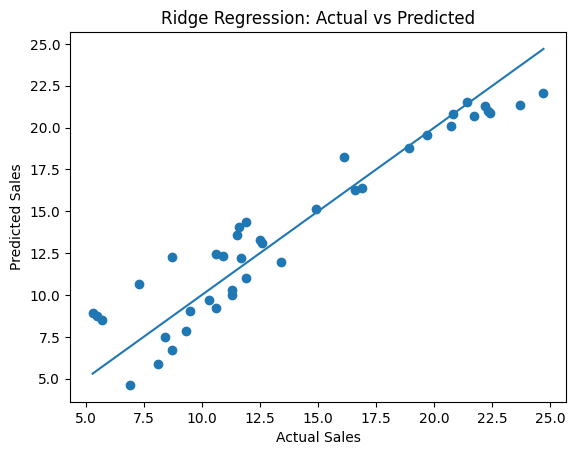

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred_ridge)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Ridge Regression: Actual vs Predicted")
plt.show()


**SUBTASK-04**
 L2 Regularization -Ridge: Implementing Ridge Regression using libraries and
comparing results with standard Linear Regression.

Kaggle Dataset Link: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction?

Tasks:
1. Load dataset and select numeric features like: enginesize, horsepower,
curbweight, citympg.
Target: price
2. Train Linear Regression and Ridge Regression.
3. Compare coefficients and check which model gives stable results.
4. Evaluate using:
RMSE, R² score
5. Conclude how Ridge helps in multicollinearity.


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load the Excel file
df = pd.read_csv("CarPrice_Assignment.csv")

# Display the first 5 rows
print(df.head())
X = df[['enginesize', 'horsepower', 'curbweight', 'citympg']]
y = df['price']


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print(f"RMSE: {lr_rmse:.2f}")
print(f"R²  : {lr_r2:.4f}")
lr_coeffs = pd.Series(
    lin_reg.coef_, index=X.columns, name="Linear Regression"
)

Linear Regression
RMSE: 3814.81
R²  : 0.8157


In [ ]:
ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=10))
])

ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
ridge_rmse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression")
print(f"RMSE: {ridge_rmse:.2f}")
print(f"R²  : {ridge_r2:.4f}")
ridge_coeffs = pd.Series(
    ridge.named_steps['model'].coef_,
    index=X.columns,
    name="Ridge Regression"
)



Ridge Regression
RMSE: 15207051.66
R²  : 0.8074


In [ ]:
coeff_comparison = pd.concat([lr_coeffs, ridge_coeffs], axis=1)
coeff_comparison
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression"],
    "RMSE": [lr_rmse, ridge_rmse],
    "R2": [lr_r2, ridge_r2]
})

print(results)


               Model          RMSE        R2
0  Linear Regression  3.814814e+03  0.815657
1   Ridge Regression  1.520705e+07  0.807369


**SUBTASK-05**

L2 Regularization -Ridge: Implementing Ridge Regression using libraries and
comparing results with standard Linear Regression.

Kaggle Dataset Link:
https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

Tasks:
1. Load dataset and select features:
Engine Size, Cylinders, Fuel Consumption
Target: CO2 Emissions
2. Apply StandardScaler.
3. Train Linear Regression and Ridge Regression.
4. Use Ridge with multiple alpha values and find best alpha using:
GridSearchCV
5. Report best model performance and compare with Linear Regression.


In [12]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
# Load dataset
data = pd.read_csv("CO2 Emissions_Canada.csv")  # change path if needed

# Select required features
features = ["Engine Size(L)", "Cylinders", "Fuel Consumption Comb (L/100 km)"]
target = "CO2 Emissions(g/km)"

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lr = lin_reg.predict(X_test_scaled)
ridge = Ridge()

param_grid = {
    "alpha": [0.01, 0.1, 1, 10, 50, 100]
}

grid = GridSearchCV(
    ridge,
    param_grid,
    cv=5,
    scoring="r2"
)

grid.fit(X_train_scaled, y_train)

best_ridge = grid.best_estimator_
print("Best Alpha:", grid.best_params_)

y_pred_ridge = best_ridge.predict(X_test_scaled)


Best Alpha: {'alpha': 100}


In [22]:
def evaluate_model(name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}")
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)
    print("-------------------------")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Best Ridge Regression", y_test, y_pred_ridge)

Linear Regression
MSE: 1360121073.217982
RMSE: 36879.819321927025
R2 Score: 0.8226775450640491
-------------------------
Best Ridge Regression
MSE: 1369656168.392947
RMSE: 37008.86607818385
R2 Score: 0.8214344303753895
-------------------------


In [23]:
# Get feature names directly from training data
feature_names = X_train.columns

# Create DataFrame safely
coef_comparison = pd.DataFrame({
    "Feature": feature_names,
    "Linear Coef": lin_reg.coef_,
    "Ridge Coef": best_ridge.coef_
})

print(coef_comparison)



          Feature   Linear Coef    Ridge Coef
0              Id   -946.987268   -933.576448
1      MSSubClass  -8588.504132  -6776.847229
2     LotFrontage  -2945.854496  -1962.561212
3         LotArea   4869.193287   4360.324233
4     OverallQual  24510.306339  21328.143388
5     OverallCond   4685.786267   4013.928051
6       YearBuilt   8211.496173   6501.542338
7    YearRemodAdd   3475.881631   4688.524958
8      MasVnrArea   4270.234817   4500.939888
9      BsmtFinSF1   3722.038825   4203.711896
10     BsmtFinSF2   -612.387988   -422.842713
11      BsmtUnfSF   -691.027151   -125.959392
12    TotalBsmtSF   2957.589032   4099.782721
13       1stFlrSF   7611.005360   6758.166750
14       2ndFlrSF   9108.518462   7563.796443
15   LowQualFinSF    485.431773    396.471330
16      GrLivArea  13290.691159  11358.991461
17   BsmtFullBath   5879.096358   5223.185791
18   BsmtHalfBath   -271.779722   -494.777970
19       FullBath   1580.536610   3137.528769
20       HalfBath  -1162.334062   